In [1]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
#from scripts.SNR import SNR
from scripts.plot_images import plot_images
from scripts.plot_line_defect import plot_line
from scripts.Amp_phase_func import *
from scripts.plot_rect import *
from scipy import fft

In [2]:
loaded_node_temp= pd.read_pickle(Dict_temp_1_5)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_1_5)
time=loaded_node_temp.keys()

In [3]:
temp =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 3:  # Make sure the list has at least 2 elements
        temp.append(loaded_node_temp[key][2])
t = list(loaded_node_temp.keys())
t = np.array(t)


In [4]:
degree = 8  # Degree of the polynomial. You might need to adjust this based on your data.
coeffs = np.polyfit(t, temp, degree)
poly = np.polyval(coeffs, t)
#flattened_temp = temp  + np.mean(temp)
flattened_temp = temp - poly + np.mean(poly)

In [5]:
flattened_temp

array([25.53122636, 25.52613306, 25.52155402, 25.51787747, 25.51509212,
       25.51308714, 25.51185212, 25.51157709, 25.5119525 , 25.5131692 ,
       25.51471842, 25.51689177, 25.51948125, 25.52217918, 25.52487826,
       25.5277715 , 25.53045224, 25.53261414, 25.53445115, 25.53615752,
       25.5368278 , 25.53705677, 25.53663953, 25.53567138, 25.53404791,
       25.53186493, 25.52921848, 25.52630482, 25.52302042, 25.51936197,
       25.51602634, 25.5127106 , 25.50931199, 25.50642796, 25.50405608,
       25.50209413, 25.50064   , 25.50009175, 25.5000476 , 25.50060588,
       25.50196506, 25.50392373, 25.50648061, 25.50943453, 25.51278442,
       25.51642931, 25.52036836, 25.52400078, 25.5276259 , 25.53134311,
       25.5342548 , 25.53685765, 25.53903674, 25.54052081, 25.54119513,
       25.54135952, 25.54081384, 25.53954322, 25.5376772 , 25.53520104,
       25.53241481, 25.5293186 , 25.52569751, 25.52218176, 25.51875655,
       25.51522212, 25.51197871, 25.50941134, 25.5071508 , 25.50

In [6]:
temp

[25.0005,
 25.0012,
 25.0022,
 25.0039,
 25.0063,
 25.0093,
 25.0129,
 25.0173,
 25.0222,
 25.0278,
 25.0336,
 25.0399,
 25.0465,
 25.0531,
 25.0596,
 25.0662,
 25.0725,
 25.0782,
 25.0835,
 25.0886,
 25.0926,
 25.0961,
 25.0989,
 25.1011,
 25.1026,
 25.1035,
 25.1039,
 25.104,
 25.1037,
 25.103,
 25.1026,
 25.1022,
 25.1017,
 25.1017,
 25.1022,
 25.1031,
 25.1045,
 25.1068,
 25.1096,
 25.113,
 25.1172,
 25.122,
 25.1274,
 25.1332,
 25.1394,
 25.1459,
 25.1527,
 25.1592,
 25.1657,
 25.1723,
 25.1781,
 25.1836,
 25.1887,
 25.1931,
 25.1967,
 25.1998,
 25.2022,
 25.2039,
 25.205,
 25.2055,
 25.2057,
 25.2056,
 25.205,
 25.2045,
 25.2041,
 25.2036,
 25.2034,
 25.2039,
 25.2047,
 25.2058,
 25.2078,
 25.2105,
 25.2138,
 25.2177,
 25.2224,
 25.2276,
 25.2333,
 25.2394,
 25.2458,
 25.2526,
 25.2592,
 25.2657,
 25.2723,
 25.2784,
 25.2839,
 25.2891,
 25.2938,
 25.2976,
 25.3009,
 25.3036,
 25.3055,
 25.3067,
 25.3074,
 25.3077,
 25.3077,
 25.3072,
 25.3066,
 25.3062,
 25.3058,
 25.3054,
 25.30

In [7]:
poly

array([24.99047995, 24.99627325, 25.00185229, 25.00722884, 25.01241419,
       25.01741917, 25.02225419, 25.02692922, 25.0314538 , 25.03583711,
       25.04008789, 25.04421453, 25.04822506, 25.05212712, 25.05592805,
       25.05963481, 25.06325407, 25.06679217, 25.07025516, 25.07364878,
       25.07697851, 25.08024953, 25.08346678, 25.08663492, 25.08975839,
       25.09284137, 25.09588783, 25.09890149, 25.10188589, 25.10484434,
       25.10777997, 25.11069571, 25.11359431, 25.11647835, 25.11935022,
       25.12221218, 25.12506631, 25.12791455, 25.1307587 , 25.13360043,
       25.13644125, 25.13928257, 25.14212569, 25.14497178, 25.14782189,
       25.15067699, 25.15353795, 25.15640553, 25.15928041, 25.16216319,
       25.1650515 , 25.16794865, 25.17086957, 25.17378549, 25.17671117,
       25.17964679, 25.18259247, 25.18556309, 25.18852911, 25.19150527,
       25.1944915 , 25.19748771, 25.2005088 , 25.20352455, 25.20654975,
       25.20958419, 25.21262759, 25.21569497, 25.2187555 , 25.22

In [8]:
# Perform Fourier Transformation
temp_fft = fft.fft(flattened_temp)
frequencies = fft.fftfreq(len(t), np.mean(np.diff(t)))

In [9]:
# Find the index of the closest frequency to 1.5
idx = np.argmin(np.abs(frequencies - 1.5))

# Now, you can extract amplitude and phase for this frequency
amplitude = np.abs(temp_fft[idx])
phase = np.angle(temp_fft[idx])

# Proceed to reconstruct the signal using this amplitude and phase
reconstructed_temp = amplitude * np.cos(2 * np.pi * frequencies[idx] * t + phase)


In [10]:
amplitude

3.040962800743353

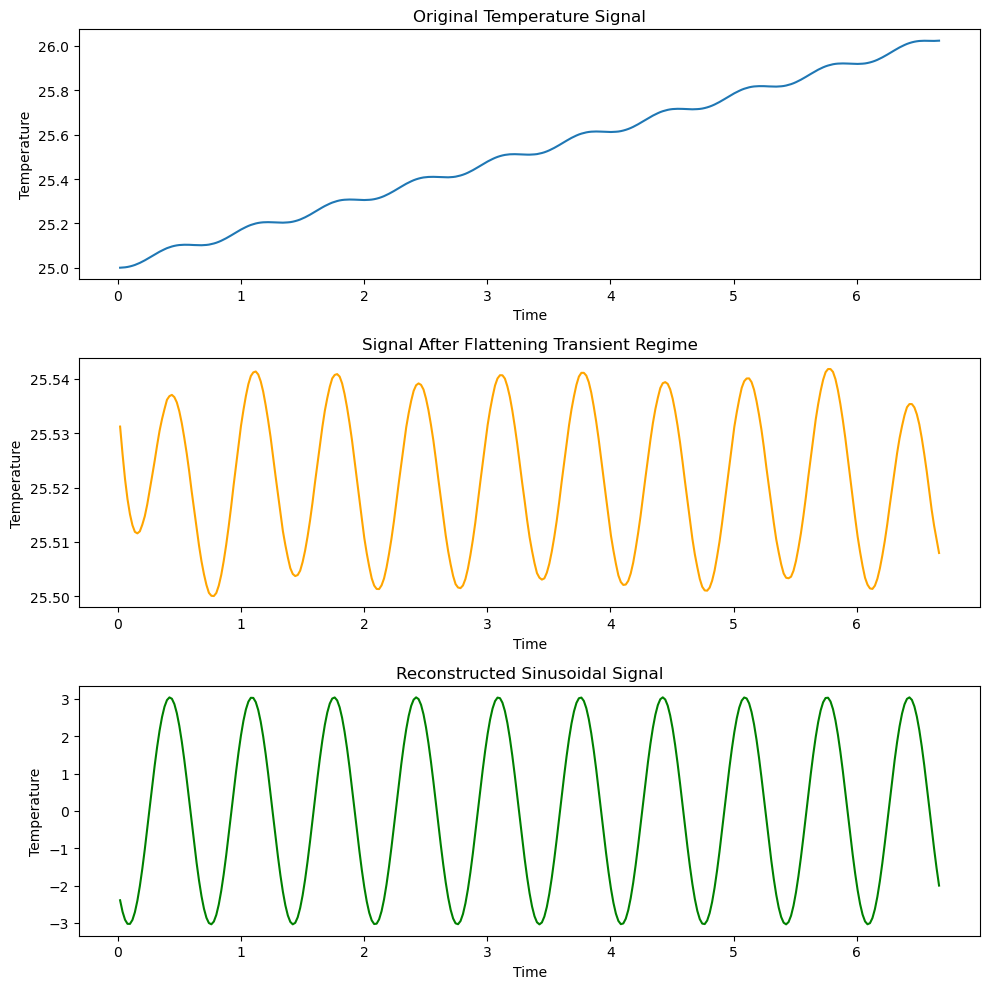

In [11]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(t, temp, label='Original Signal')
plt.title('Original Temperature Signal')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.subplot(3, 1, 2)
plt.plot(t, flattened_temp, label='Flattened Signal', color='orange')
plt.title('Signal After Flattening Transient Regime')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.subplot(3, 1, 3)
plt.plot(t, reconstructed_temp, label='Reconstructed Signal', color='green')
plt.title('Reconstructed Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

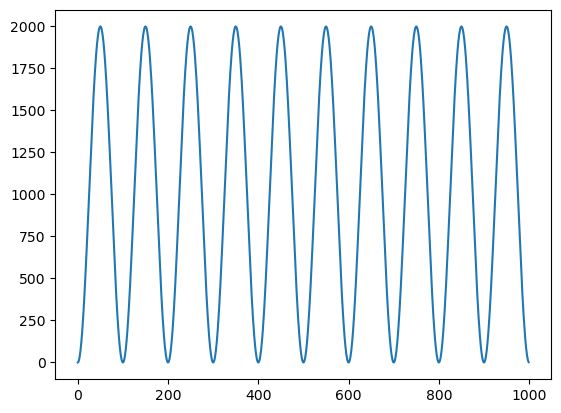

In [12]:
import numpy as np

Q = 1000
freq = 1  # Just an example value; replace with your actual frequency
omega = 2 * np.pi * freq  
num_waves = 10  # Replace with the desired number of waves
room_temp = 25
num_steps = 1000

# Calculate the period of one wave
period = 1 / freq  

# Calculate t_end for the given number of waves
t_end = num_waves * period  

# Now, generate time_values and other related values as before
time_values = np.linspace(0, t_end, num_steps, endpoint=False)
cos_values = np.cos(omega * time_values)
heat_flux = Q * (1 - cos_values)
plt.plot(heat_flux)

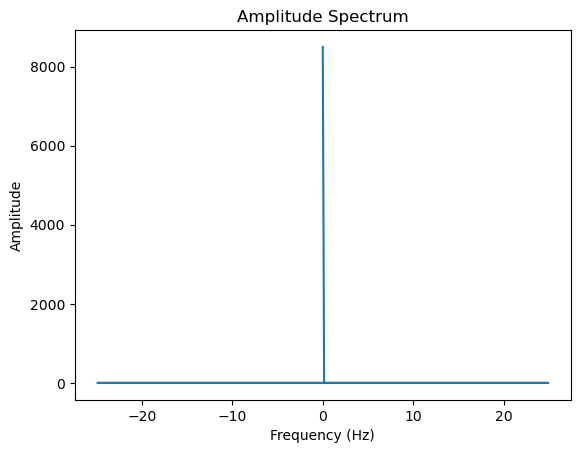

In [13]:
plt.plot(frequencies, np.abs(temp_fft))
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [14]:
temp1 = 2 * np.pi * frequencies[idx]  # Check the type of temp1
temp2 = temp1 * t  # Check the type and shape of temp2
temp3 = temp2 + phase  # Check the type and shape of temp3
reconstructed_temp = amplitude * np.sin(temp3)  # This should work if temp3 is correct


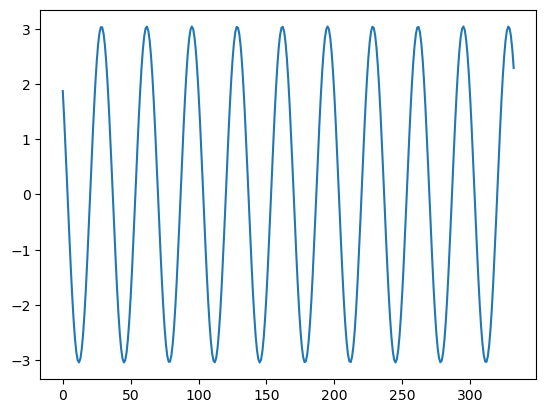

In [15]:
plt.plot(reconstructed_temp)

In [16]:
from scipy.signal import find_peaks
data= temp
data = np.array(data)
# Find the peaks and troughs
peaks, _ = find_peaks(data)
troughs, _ = find_peaks(-data)

# Fit polynomial to the peaks and troughs
x = np.concatenate([peaks, troughs])
y = data[x]
coefficients = np.polyfit(x, y, deg=5)  # Choose the degree of the polynomial as appropriate
polynomial_fit = np.polyval(coefficients, np.arange(len(data)))

# Subtract the polynomial fit to flatten the transient regime
flattened_data = data - polynomial_fit

In [17]:
fft_result = np.fft.fft(flattened_data)
frequencies = np.fft.fftfreq(len(flattened_data))

# Assuming you know the frequency of interest, isolate the corresponding FFT component
freq_of_interest = 1  # Replace with actual frequency
index = np.argmin(np.abs(frequencies - freq_of_interest))

amplitude = np.abs(fft_result[index])
phase = np.angle(fft_result[index])


In [18]:
t = np.linspace(0, len(data), num=len(data), endpoint=False)  # Replace with actual time values
reconstructed_signal = amplitude * np.sin(2 * np.pi * freq_of_interest * t + phase)


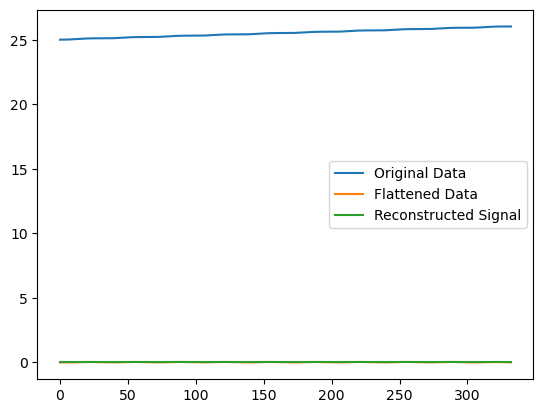

In [19]:
plt.plot(t, data, label='Original Data')
plt.plot(t, flattened_data, label='Flattened Data')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal')
plt.legend()
plt.show()


In [20]:
import math

# Given data for Silicon
rho = 2329  # kg/m^3, Density
c = 700    # J/kg·K, Specific heat
k = 149    # W/m·K, Thermal conductivity
f = 1.5   # Hz, Frequency of oscillation
Q = 5

# Calculate thermal diffusivity
alpha = k / (rho * c)

# Calculate angular frequency
omega = 2 * math.pi * f

# Calculate thermal penetration depth
mu = math.sqrt(2 * alpha / omega)



In [21]:
sigma= (1+1j)*(np.sqrt(omega /2*alpha))
#incase of real only of sigma.
#sigma= 1*(np.sqrt(omega /2*alpha))
Gama= 1
L= 1e-3
n=10
exp_term=0
for i in range(10):
    exp_term+= ((-Gama)**n)*np.exp(-2*n*sigma*L)
    print(((-Gama)**n)*np.exp(-2*n*sigma*L))
    
T= (Q/(k*sigma))*(1+2*exp_term)
print(T)

(0.999584940932009-0.00041488684160569773j)
(0.999584940932009-0.00041488684160569773j)
(0.999584940932009-0.00041488684160569773j)
(0.999584940932009-0.00041488684160569773j)
(0.999584940932009-0.00041488684160569773j)
(0.999584940932009-0.00041488684160569773j)
(0.999584940932009-0.00041488684160569773j)
(0.999584940932009-0.00041488684160569773j)
(0.999584940932009-0.00041488684160569773j)
(0.999584940932009-0.00041488684160569773j)
(16.964836809397493-16.97825405769726j)


In [22]:
sigma

(0.020752954591038215+0.020752954591038215j)

In [23]:
T

(16.964836809397493-16.97825405769726j)

In [24]:
time=60
temp=[]
Time=[]
for t in range(1,time):
    T_of_time= 0.5* T*(1+np.cos(omega*t))
    temp.append(T_of_time)
    Time.append(t)

c:\Users\Doaa Mohamed\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


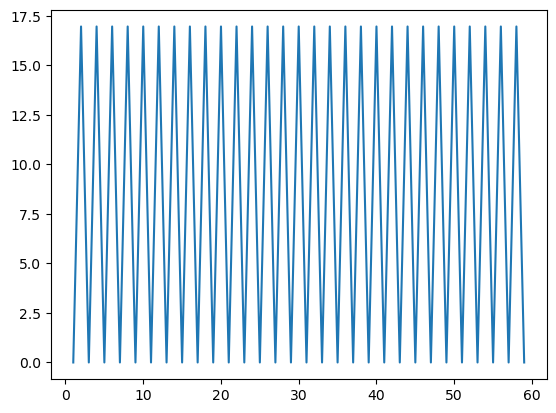

In [25]:
plt.plot(Time, temp)